In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
news_jiang = pd.read_csv('C:/Users/CHARLIE/Desktop/文字探勘/期末/蔣萬安新聞.csv', index_col=0)
news_33 = pd.read_csv('C:/Users/CHARLIE/Desktop/文字探勘/期末/黃珊珊新聞.csv', index_col=0)
news_clock = pd.read_csv('C:/Users/CHARLIE/Desktop/文字探勘/期末/陳時中新聞.csv', index_col=0)

In [3]:
news_clock = news_clock.drop(columns = ['Year', 'Month', 'Day'])
news_33 = news_33.drop(columns = ['Year', 'Month', 'Day'])
news_jiang = news_jiang.drop(columns = ['Year', 'Month', 'Day'])

In [6]:
#ptt_all = pd.concat([jiang, huang_33, clock], axis = 0, ignore_index=True)
#ptt_all.dropna(subset=['標題'], inplace=True)
#ptt_all

,標題,發布日期,Year,Month,看板,內文(clean),Day,人物關鍵字
0,[新聞] 「蔣師」備課中！王世堅自曝對蔣萬安已,2022-12-02,2022,12,Gossiping,ETtoday新聞雲 > 政治 年12月02日 12:36 「蔣師」備課中！王世堅自曝對...,2,蔣萬安
1,Re: [新聞] 蔣萬安市政一問三不知 王世堅撂話：準備,2022-11-29,2022,11,Gossiping,蔣萬安 就是在裝弱，他都當兩任台北立委，怎可能什麼都不懂 問題是~~國民黨 拿不出一個能當總...,29,蔣萬安
2,Re: [新聞] 蔣萬安市政一問三不知 王世堅撂話：準備,2022-11-29,2022,11,Gossiping,: 蔣萬安市政一問三不知 王世堅撂話：準備好當「蔣師」了 : : 自由時報 記者鄭名翔／...,29,蔣萬安
3,Re: [新聞] 蔣萬安市政一問三不知 王世堅撂話：準備,2022-11-29,2022,11,Gossiping,這些綠媒很急喔，每個還沒上任的非綠營首長都已經開始唱衰。現在連交接都還沒交接， 已經在那裡...,29,蔣萬安
4,Re: [新聞] 蔣萬安市政一問三不知 王世堅撂話：準備,2022-11-29,2022,11,Gossiping,勸蔣萬安現在馬上 全力全面補習市政 因為王世堅這個老師的脾氣可不好 當年對郝龍斌施行教育...,29,蔣萬安
...,...,...,...,...,...,...,...,...
18355,[討論] 陳時中：鄭重澄清 台灣是個有法律的地方,2022-07-22,2022,7,HatePolitics,如題 看到有人在分享 民進黨台北市長候選人陳時中上電視專訪 阿肥我沒有看原本的受訪片段 但...,22,陳時中
18356,Re: [討論] 黃暐瀚：陳時中｢學阿扁就贏 像阿智就輸,2022-07-22,2022,7,HatePolitics,: : 最中立理性的資深媒體人黃暐瀚表示： : : 這是民進黨28年來，繼陳水扁之後，最接...,22,陳時中
18357,Re: [新聞] 陳時中聲勢暴漲？媒體人一看搖頭傳授蔣,2022-07-22,2022,7,HatePolitics,我給的意見絕對最中肯 左打柯屁，右打時鐘，邊緣化謊33 有些藍營的人被柯屁收買了 一直叫蔣...,22,陳時中
18358,[新聞] 人氣爆棚！陳時中辦27場「與你相見歡」,2022-07-22,2022,7,HatePolitics,人氣爆棚！陳時中辦27場「與你相見歡」 他曝粉絲搶破頭 三立新聞 /07/22 17:19...,22,陳時中


# 內文整理

**先挑出回文**

In [7]:
all_re = ptt_all[ptt_all['標題'].str.contains('Re: ')]
all_re

,標題,發布日期,Year,Month,看板,內文(clean),Day,人物關鍵字
1,Re: [新聞] 蔣萬安市政一問三不知 王世堅撂話：準備,2022-11-29,2022,11,Gossiping,蔣萬安 就是在裝弱，他都當兩任台北立委，怎可能什麼都不懂 問題是~~國民黨 拿不出一個能當總...,29,蔣萬安
2,Re: [新聞] 蔣萬安市政一問三不知 王世堅撂話：準備,2022-11-29,2022,11,Gossiping,: 蔣萬安市政一問三不知 王世堅撂話：準備好當「蔣師」了 : : 自由時報 記者鄭名翔／...,29,蔣萬安
3,Re: [新聞] 蔣萬安市政一問三不知 王世堅撂話：準備,2022-11-29,2022,11,Gossiping,這些綠媒很急喔，每個還沒上任的非綠營首長都已經開始唱衰。現在連交接都還沒交接， 已經在那裡...,29,蔣萬安
4,Re: [新聞] 蔣萬安市政一問三不知 王世堅撂話：準備,2022-11-29,2022,11,Gossiping,勸蔣萬安現在馬上 全力全面補習市政 因為王世堅這個老師的脾氣可不好 當年對郝龍斌施行教育...,29,蔣萬安
5,Re: [新聞] 蔣萬安市政一問三不知 王世堅撂話：準備,2022-11-29,2022,11,Gossiping,: : 王世堅認為，當「蔣師」將比當「柯學家」還輕鬆，因為柯文哲「討厭歸討厭」 : 王世堅...,29,蔣萬安
...,...,...,...,...,...,...,...,...
18353,Re: [新聞] 陳時中聲勢暴漲？媒體人一看搖頭傳授蔣,2022-07-22,2022,7,HatePolitics,: 1.新聞網址︰ : : : 2.新聞來源︰ : : 中時新聞網 : 3.完整新聞標題...,22,陳時中
18354,Re: [討論] 陳時中：鄭重澄清 台灣是個有法律的地方,2022-07-22,2022,7,HatePolitics,台灣是個有法律的地方 法律誰定的 党定的 所以法律就是党意 明明可以開邊境0+7 党不開放...,22,陳時中
18356,Re: [討論] 黃暐瀚：陳時中｢學阿扁就贏 像阿智就輸,2022-07-22,2022,7,HatePolitics,: : 最中立理性的資深媒體人黃暐瀚表示： : : 這是民進黨28年來，繼陳水扁之後，最接...,22,陳時中
18357,Re: [新聞] 陳時中聲勢暴漲？媒體人一看搖頭傳授蔣,2022-07-22,2022,7,HatePolitics,我給的意見絕對最中肯 左打柯屁，右打時鐘，邊緣化謊33 有些藍營的人被柯屁收買了 一直叫蔣...,22,陳時中


In [8]:
def split_re(x):
    a = x.split(' ')
    b = ''.join(a[1:])
    return b

In [9]:
all_re['標題'] = all_re['標題'].map(split_re)

C:\Users\CHARLIE\AppData\Local\Temp/ipykernel_25728/2256881737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_re['標題'] = all_re['標題'].map(split_re)


In [10]:
all_re

,標題,發布日期,Year,Month,看板,內文(clean),Day,人物關鍵字
1,[新聞]蔣萬安市政一問三不知王世堅撂話：準備,2022-11-29,2022,11,Gossiping,蔣萬安 就是在裝弱，他都當兩任台北立委，怎可能什麼都不懂 問題是~~國民黨 拿不出一個能當總...,29,蔣萬安
2,[新聞]蔣萬安市政一問三不知王世堅撂話：準備,2022-11-29,2022,11,Gossiping,: 蔣萬安市政一問三不知 王世堅撂話：準備好當「蔣師」了 : : 自由時報 記者鄭名翔／...,29,蔣萬安
3,[新聞]蔣萬安市政一問三不知王世堅撂話：準備,2022-11-29,2022,11,Gossiping,這些綠媒很急喔，每個還沒上任的非綠營首長都已經開始唱衰。現在連交接都還沒交接， 已經在那裡...,29,蔣萬安
4,[新聞]蔣萬安市政一問三不知王世堅撂話：準備,2022-11-29,2022,11,Gossiping,勸蔣萬安現在馬上 全力全面補習市政 因為王世堅這個老師的脾氣可不好 當年對郝龍斌施行教育...,29,蔣萬安
5,[新聞]蔣萬安市政一問三不知王世堅撂話：準備,2022-11-29,2022,11,Gossiping,: : 王世堅認為，當「蔣師」將比當「柯學家」還輕鬆，因為柯文哲「討厭歸討厭」 : 王世堅...,29,蔣萬安
...,...,...,...,...,...,...,...,...
18353,[新聞]陳時中聲勢暴漲？媒體人一看搖頭傳授蔣,2022-07-22,2022,7,HatePolitics,: 1.新聞網址︰ : : : 2.新聞來源︰ : : 中時新聞網 : 3.完整新聞標題...,22,陳時中
18354,[討論]陳時中：鄭重澄清台灣是個有法律的地方,2022-07-22,2022,7,HatePolitics,台灣是個有法律的地方 法律誰定的 党定的 所以法律就是党意 明明可以開邊境0+7 党不開放...,22,陳時中
18356,[討論]黃暐瀚：陳時中｢學阿扁就贏像阿智就輸,2022-07-22,2022,7,HatePolitics,: : 最中立理性的資深媒體人黃暐瀚表示： : : 這是民進黨28年來，繼陳水扁之後，最接...,22,陳時中
18357,[新聞]陳時中聲勢暴漲？媒體人一看搖頭傳授蔣,2022-07-22,2022,7,HatePolitics,我給的意見絕對最中肯 左打柯屁，右打時鐘，邊緣化謊33 有些藍營的人被柯屁收買了 一直叫蔣...,22,陳時中


**回文以外**

In [11]:
all_except_re = ptt_all[~ptt_all['標題'].str.contains('Re: ')]
all_except_re

,標題,發布日期,Year,Month,看板,內文(clean),Day,人物關鍵字
0,[新聞] 「蔣師」備課中！王世堅自曝對蔣萬安已,2022-12-02,2022,12,Gossiping,ETtoday新聞雲 > 政治 年12月02日 12:36 「蔣師」備課中！王世堅自曝對...,2,蔣萬安
7,[新聞] 蔣萬安後援會總幹事收中資快篩涉賄 反滲,2022-11-29,2022,11,Gossiping,蔣萬安後援會總幹事收中資快篩涉賄 反滲透法起訴 新頭殼newtalk |洪翠蓮 綜合報導 ...,29,蔣萬安
10,[新聞] 周玉蔻開噴了！「自己的台北自己救」嗆蔣萬安草包：公開道歉,2022-11-29,2022,11,Gossiping,1.媒體來源: ETTODAY 2.記者署名: 記者曾筠淇／綜合報導 3.完整新聞標題: ...,29,蔣萬安
11,[新聞] 蔣萬安當選！網看4任北市長學歷驚：「脫離台大統治」,2022-11-28,2022,11,Gossiping,備註請放最後面 違者新聞文章刪除 1.媒體來源: 華視 2.記者署名: 林彥廷 3.完整新...,28,蔣萬安
15,[新聞] 迫切要解決市政難題？蔣萬安頻謝謝沒回應,2022-11-28,2022,11,Gossiping,TVBS 迫切要解決市政難題？蔣萬安頻謝謝沒回應 記者 李品誼 / 攝影 華紹平 報導 ...,28,蔣萬安
...,...,...,...,...,...,...,...,...
18349,[討論] 苦苓居然估陳時中有機會破5成得票率,2022-07-23,2022,7,HatePolitics,"在三立的鄭知道了估這個得票率 我說苦苓你會不會他媽的太扯了!有這種得票率,我看民進黨這次...",23,陳時中
18350,[新聞]黃珊珊說為選舉才道歉 陳時中反問：記得,2022-07-22,2022,7,HatePolitics,1.新聞網址︰ 2.新聞來源︰ 自由 3.完整新聞標題 黃珊珊說為選舉才道歉 陳時中反問...,22,陳時中
18352,[新聞] 「龍山寺陳情男」又出現！ 陳時中行程一連3天被突襲,2022-07-22,2022,7,HatePolitics,1.新聞網址︰ 2.新聞來源︰上報 3.完整新聞標題 「龍山寺陳情男」又出現！ 陳時中行程...,22,陳時中
18355,[討論] 陳時中：鄭重澄清 台灣是個有法律的地方,2022-07-22,2022,7,HatePolitics,如題 看到有人在分享 民進黨台北市長候選人陳時中上電視專訪 阿肥我沒有看原本的受訪片段 但...,22,陳時中


In [13]:
# all_except_re.drop_duplicates(subset=['標題'], keep = 'first', inplace=True)

c:\Users\CHARLIE\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
all_except_re

,標題,發布日期,Year,Month,看板,內文(clean),Day,人物關鍵字
0,[新聞] 「蔣師」備課中！王世堅自曝對蔣萬安已,2022-12-02,2022,12,Gossiping,ETtoday新聞雲 > 政治 年12月02日 12:36 「蔣師」備課中！王世堅自曝對...,2,蔣萬安
7,[新聞] 蔣萬安後援會總幹事收中資快篩涉賄 反滲,2022-11-29,2022,11,Gossiping,蔣萬安後援會總幹事收中資快篩涉賄 反滲透法起訴 新頭殼newtalk |洪翠蓮 綜合報導 ...,29,蔣萬安
10,[新聞] 周玉蔻開噴了！「自己的台北自己救」嗆蔣萬安草包：公開道歉,2022-11-29,2022,11,Gossiping,1.媒體來源: ETTODAY 2.記者署名: 記者曾筠淇／綜合報導 3.完整新聞標題: ...,29,蔣萬安
11,[新聞] 蔣萬安當選！網看4任北市長學歷驚：「脫離台大統治」,2022-11-28,2022,11,Gossiping,備註請放最後面 違者新聞文章刪除 1.媒體來源: 華視 2.記者署名: 林彥廷 3.完整新...,28,蔣萬安
15,[新聞] 迫切要解決市政難題？蔣萬安頻謝謝沒回應,2022-11-28,2022,11,Gossiping,TVBS 迫切要解決市政難題？蔣萬安頻謝謝沒回應 記者 李品誼 / 攝影 華紹平 報導 ...,28,蔣萬安
...,...,...,...,...,...,...,...,...
18349,[討論] 苦苓居然估陳時中有機會破5成得票率,2022-07-23,2022,7,HatePolitics,"在三立的鄭知道了估這個得票率 我說苦苓你會不會他媽的太扯了!有這種得票率,我看民進黨這次...",23,陳時中
18350,[新聞]黃珊珊說為選舉才道歉 陳時中反問：記得,2022-07-22,2022,7,HatePolitics,1.新聞網址︰ 2.新聞來源︰ 自由 3.完整新聞標題 黃珊珊說為選舉才道歉 陳時中反問...,22,陳時中
18352,[新聞] 「龍山寺陳情男」又出現！ 陳時中行程一連3天被突襲,2022-07-22,2022,7,HatePolitics,1.新聞網址︰ 2.新聞來源︰上報 3.完整新聞標題 「龍山寺陳情男」又出現！ 陳時中行程...,22,陳時中
18355,[討論] 陳時中：鄭重澄清 台灣是個有法律的地方,2022-07-22,2022,7,HatePolitics,如題 看到有人在分享 民進黨台北市長候選人陳時中上電視專訪 阿肥我沒有看原本的受訪片段 但...,22,陳時中


**統整**

In [16]:
ptt_df = pd.concat([all_re, all_except_re], axis=0, ignore_index=True)

In [17]:
ptt_df

,標題,發布日期,Year,Month,看板,內文(clean),Day,人物關鍵字
0,[新聞]蔣萬安市政一問三不知王世堅撂話：準備,2022-11-29,2022,11,Gossiping,蔣萬安 就是在裝弱，他都當兩任台北立委，怎可能什麼都不懂 問題是~~國民黨 拿不出一個能當總...,29,蔣萬安
1,[新聞]蔣萬安市政一問三不知王世堅撂話：準備,2022-11-29,2022,11,Gossiping,: 蔣萬安市政一問三不知 王世堅撂話：準備好當「蔣師」了 : : 自由時報 記者鄭名翔／...,29,蔣萬安
2,[新聞]蔣萬安市政一問三不知王世堅撂話：準備,2022-11-29,2022,11,Gossiping,這些綠媒很急喔，每個還沒上任的非綠營首長都已經開始唱衰。現在連交接都還沒交接， 已經在那裡...,29,蔣萬安
3,[新聞]蔣萬安市政一問三不知王世堅撂話：準備,2022-11-29,2022,11,Gossiping,勸蔣萬安現在馬上 全力全面補習市政 因為王世堅這個老師的脾氣可不好 當年對郝龍斌施行教育...,29,蔣萬安
4,[新聞]蔣萬安市政一問三不知王世堅撂話：準備,2022-11-29,2022,11,Gossiping,: : 王世堅認為，當「蔣師」將比當「柯學家」還輕鬆，因為柯文哲「討厭歸討厭」 : 王世堅...,29,蔣萬安
...,...,...,...,...,...,...,...,...
17294,[討論] 那個神明會託夢給 陳時中,2022-07-23,2022,7,HatePolitics,據我了解..........。 白天不做虧心事，半夜敲門心不驚 民進黨台北市長參選人陳時...,23,陳時中
17295,[討論] 苦苓居然估陳時中有機會破5成得票率,2022-07-23,2022,7,HatePolitics,"在三立的鄭知道了估這個得票率 我說苦苓你會不會他媽的太扯了!有這種得票率,我看民進黨這次...",23,陳時中
17296,[新聞] 「龍山寺陳情男」又出現！ 陳時中行程一連3天被突襲,2022-07-22,2022,7,HatePolitics,1.新聞網址︰ 2.新聞來源︰上報 3.完整新聞標題 「龍山寺陳情男」又出現！ 陳時中行程...,22,陳時中
17297,[討論] 陳時中：鄭重澄清 台灣是個有法律的地方,2022-07-22,2022,7,HatePolitics,如題 看到有人在分享 民進黨台北市長候選人陳時中上電視專訪 阿肥我沒有看原本的受訪片段 但...,22,陳時中


In [18]:
ptt_df = ptt_df[ptt_df['發布日期'].between('2022-01-01', '2022-11-25')]
ptt_df.dropna(subset=['內文(clean)'], inplace=True)
ptt_df

c:\Users\CHARLIE\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,標題,發布日期,Year,Month,看板,內文(clean),Day,人物關鍵字
33,[新聞]影》蔣萬安「奮戰勝選之夜」最新畫面曝,2022-11-25,2022,11,Gossiping,: 備註請放最後面 違者新聞文章刪除 : 1.媒體來源:中時新聞網 : 2.記者署名:丁世...,25,蔣萬安
34,[新聞]衝「她」而來？ 蔣萬安選前掃街、拔樁,2022-11-25,2022,11,Gossiping,: 蔣萬安衝著黃珊珊地盤而來 : 這有個背後意義 : 表示對蔣公子來說 : 時鐘已經不是威...,25,蔣萬安
35,[新聞]衝「她」而來？ 蔣萬安選前掃街、拔樁,2022-11-25,2022,11,Gossiping,蔣萬安衝著黃珊珊地盤而來 這有個背後意義 表示對蔣公子來說 時鐘已經不是威脅了 最後階段就...,25,蔣萬安
36,[新聞]蔣萬安立委遺缺補選民進黨授權主席徵召,2022-11-24,2022,11,Gossiping,: 國民黨立委蔣萬安辭職後，中選會決議將於明年1月8日補選，並於11月28日至12月2日受...,24,蔣萬安
37,[新聞]批蔣萬安不道德柯建銘：選舉和做人一,2022-11-24,2022,11,Gossiping,: 批蔣萬安不道德 柯建銘：選舉和做人一樣邪不勝正 : 其實我只是想看圖說故事 報導的預...,24,蔣萬安
...,...,...,...,...,...,...,...,...
17294,[討論] 那個神明會託夢給 陳時中,2022-07-23,2022,7,HatePolitics,據我了解..........。 白天不做虧心事，半夜敲門心不驚 民進黨台北市長參選人陳時...,23,陳時中
17295,[討論] 苦苓居然估陳時中有機會破5成得票率,2022-07-23,2022,7,HatePolitics,"在三立的鄭知道了估這個得票率 我說苦苓你會不會他媽的太扯了!有這種得票率,我看民進黨這次...",23,陳時中
17296,[新聞] 「龍山寺陳情男」又出現！ 陳時中行程一連3天被突襲,2022-07-22,2022,7,HatePolitics,1.新聞網址︰ 2.新聞來源︰上報 3.完整新聞標題 「龍山寺陳情男」又出現！ 陳時中行程...,22,陳時中
17297,[討論] 陳時中：鄭重澄清 台灣是個有法律的地方,2022-07-22,2022,7,HatePolitics,如題 看到有人在分享 民進黨台北市長候選人陳時中上電視專訪 阿肥我沒有看原本的受訪片段 但...,22,陳時中


**陳時中聲量**

In [19]:
clock_volume = ptt_df[(ptt_df['內文(clean)'].str.contains('陳時中'))|(ptt_df['標題'].str.contains('陳時中'))]
clock_volume

,標題,發布日期,Year,Month,看板,內文(clean),Day,人物關鍵字
43,[新聞]「蔣萬安不一定會贏」 醫分析藍綠支持者,2022-11-23,2022,11,Gossiping,"島主昨天開示了 可能是最近滾動式看到情勢有變化!? ""我跟你講我對姍姍姐跟蔣萬安的尊敬或...",23,蔣萬安
44,[新聞]「蔣萬安不一定會贏」 醫分析藍綠支持者,2022-11-23,2022,11,Gossiping,看完笑死 說蔣不一定贏可以理解 但陳時中會贏...... 不錯喔，畢竟是死忠的 我就看陳時...,23,蔣萬安
45,[新聞]「蔣萬安不一定會贏」 醫分析藍綠支持者,2022-11-23,2022,11,Gossiping,說真的，陳時中讓大家看不到蔣萬安委員的缺點。因為太氣了。 蔣委員的問題蠻大的， 譬如疫苗問...,23,蔣萬安
49,[爆卦]生意人不爽蔣萬安,2022-11-20,2022,11,Gossiping,我家深藍 我家人繳了40年黨費 有拿到國民黨部寄來的國民黨榮譽黨員的感謝狀 但是我越長大越...,20,蔣萬安
51,[新聞]王世堅「支持陳時中、票留黃珊珊」蔣萬安,2022-11-17,2022,11,Gossiping,公子厚顏至此，只能說令人”堂目結舌”。 對他來講，只是嘻皮笑臉的蹭這個話題， 卻不知道這個...,17,蔣萬安
...,...,...,...,...,...,...,...,...
17294,[討論] 那個神明會託夢給 陳時中,2022-07-23,2022,7,HatePolitics,據我了解..........。 白天不做虧心事，半夜敲門心不驚 民進黨台北市長參選人陳時...,23,陳時中
17295,[討論] 苦苓居然估陳時中有機會破5成得票率,2022-07-23,2022,7,HatePolitics,"在三立的鄭知道了估這個得票率 我說苦苓你會不會他媽的太扯了!有這種得票率,我看民進黨這次...",23,陳時中
17296,[新聞] 「龍山寺陳情男」又出現！ 陳時中行程一連3天被突襲,2022-07-22,2022,7,HatePolitics,1.新聞網址︰ 2.新聞來源︰上報 3.完整新聞標題 「龍山寺陳情男」又出現！ 陳時中行程...,22,陳時中
17297,[討論] 陳時中：鄭重澄清 台灣是個有法律的地方,2022-07-22,2022,7,HatePolitics,如題 看到有人在分享 民進黨台北市長候選人陳時中上電視專訪 阿肥我沒有看原本的受訪片段 但...,22,陳時中


**蔣萬安聲量**

In [20]:
jiang_volume = ptt_df[(ptt_df['內文(clean)'].str.contains('蔣萬安'))|(ptt_df['標題'].str.contains('蔣萬安'))]
jiang_volume

,標題,發布日期,Year,Month,看板,內文(clean),Day,人物關鍵字
33,[新聞]影》蔣萬安「奮戰勝選之夜」最新畫面曝,2022-11-25,2022,11,Gossiping,: 備註請放最後面 違者新聞文章刪除 : 1.媒體來源:中時新聞網 : 2.記者署名:丁世...,25,蔣萬安
34,[新聞]衝「她」而來？ 蔣萬安選前掃街、拔樁,2022-11-25,2022,11,Gossiping,: 蔣萬安衝著黃珊珊地盤而來 : 這有個背後意義 : 表示對蔣公子來說 : 時鐘已經不是威...,25,蔣萬安
35,[新聞]衝「她」而來？ 蔣萬安選前掃街、拔樁,2022-11-25,2022,11,Gossiping,蔣萬安衝著黃珊珊地盤而來 這有個背後意義 表示對蔣公子來說 時鐘已經不是威脅了 最後階段就...,25,蔣萬安
36,[新聞]蔣萬安立委遺缺補選民進黨授權主席徵召,2022-11-24,2022,11,Gossiping,: 國民黨立委蔣萬安辭職後，中選會決議將於明年1月8日補選，並於11月28日至12月2日受...,24,蔣萬安
37,[新聞]批蔣萬安不道德柯建銘：選舉和做人一,2022-11-24,2022,11,Gossiping,: 批蔣萬安不道德 柯建銘：選舉和做人一樣邪不勝正 : 其實我只是想看圖說故事 報導的預...,24,蔣萬安
...,...,...,...,...,...,...,...,...
17273,[討論] 台北人真的會選陳時中?,2022-07-25,2022,7,HatePolitics,看民調顯示 台北三角爭霸 比往常更難預料 黃珊珊跟蔣萬安互相吃到同樣票源 反而對於阿中是利...,25,陳時中
17278,[新聞] 「怒而不威」暗諷柯文哲？ 陳時中笑稱：,2022-07-24,2022,7,HatePolitics,「怒而不威」暗諷柯文哲？ 陳時中笑稱：僅是自己人生哲學 自由 〔記者鄭名翔／台北報導〕前...,24,陳時中
17281,[討論] 陳時中現在會怎麼看林智堅？,2022-07-24,2022,7,HatePolitics,我突然很好奇這件事了。 本來掙扎了半天不說死，終於看到蔣萬安躺平後有機會。 華麗轉身宣布參...,24,陳時中
17282,[討論] 吳子嘉：台北市有比陳時中還爛的當過市長,2022-07-24,2022,7,HatePolitics,就昨天的吳子嘉網路節目 董事長開講 有觀眾對於蔣萬安選情感到憂心，並直言很難想像陳時中當台...,24,陳時中


**黃珊珊**

In [21]:
volume_33 = ptt_df[(ptt_df['內文(clean)'].str.contains('黃珊珊'))|(ptt_df['標題'].str.contains('黃珊珊'))]
volume_33

,標題,發布日期,Year,Month,看板,內文(clean),Day,人物關鍵字
34,[新聞]衝「她」而來？ 蔣萬安選前掃街、拔樁,2022-11-25,2022,11,Gossiping,: 蔣萬安衝著黃珊珊地盤而來 : 這有個背後意義 : 表示對蔣公子來說 : 時鐘已經不是威...,25,蔣萬安
35,[新聞]衝「她」而來？ 蔣萬安選前掃街、拔樁,2022-11-25,2022,11,Gossiping,蔣萬安衝著黃珊珊地盤而來 這有個背後意義 表示對蔣公子來說 時鐘已經不是威脅了 最後階段就...,25,蔣萬安
43,[新聞]「蔣萬安不一定會贏」 醫分析藍綠支持者,2022-11-23,2022,11,Gossiping,"島主昨天開示了 可能是最近滾動式看到情勢有變化!? ""我跟你講我對姍姍姐跟蔣萬安的尊敬或...",23,蔣萬安
46,[新聞]黃珊珊造勢近萬人到場百萬網紅諷蔣萬安,2022-11-21,2022,11,Gossiping,所以ee 是有生小孩嗎？ 講的是很令人動容啦 但是身為少子化辦公室的頭頭的頭頭 你知道你自...,21,蔣萬安
47,[新聞]黃珊珊造勢近萬人到場百萬網紅諷蔣萬安,2022-11-20,2022,11,Gossiping,所以黃珊珊當幾天兵? 講的是很令人動容啦 但你挺的候選人好像是裡面當兵天數最少的欸... ...,20,蔣萬安
...,...,...,...,...,...,...,...,...
17270,[討論] 聊開心話題 陳時中像不像猛將山口多聞？,2022-07-25,2022,7,HatePolitics,我知道大家被藍白腦猛攻論文跟球場，有點手忙腳亂， 聊點開心的吧。大家覺得陳時中跟二戰日本猛...,25,陳時中
17273,[討論] 台北人真的會選陳時中?,2022-07-25,2022,7,HatePolitics,看民調顯示 台北三角爭霸 比往常更難預料 黃珊珊跟蔣萬安互相吃到同樣票源 反而對於阿中是利...,25,陳時中
17274,[討論] 陳時中肯定單獨過半,2022-07-25,2022,7,HatePolitics,苦苓預言：陳時中得票率55％當選 透露綠營接民調「唯一支持黃珊珊」 各位塔綠班不用擔心棄保...,25,陳時中
17285,[討論] 柯文哲一直說不理陳時中,2022-07-24,2022,7,HatePolitics,剛看到好像是今天的新聞片段 柯文哲又批評了陳時中的防疫 重複了黃珊珊的不是因為選舉會道歉嗎...,24,陳時中


# **新聞 關聯規則**

In [14]:
#news = news[news['發布日期'].between('2022-01-01', '2022-11-25')]
#news.dropna(subset=['內文(clean)'], inplace=True)
#news

c:\Users\CHARLIE\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,標題,發布日期,Year,Month,看板,內文(clean),Day,人物關鍵字
48,[新聞] 柯建銘轟蔣萬安「站在受難者血跡上」 陳,2022-11-25,2022,11,Gossiping,1.媒體來源: 風傳媒 2.記者署名: 黃信維 3.完整新聞標題: 柯建銘轟蔣萬安「站在受...,25,蔣萬安
50,[新聞] 影》蔣萬安「奮戰勝選之夜」 最新畫面曝,2022-11-25,2022,11,Gossiping,備註請放最後面 違者新聞文章刪除 1.媒體來源:中時新聞網 2.記者署名:丁世傑 、中時、...,25,蔣萬安
51,[新聞] 外傳宋楚瑜稱「心是藍的」挺蔣萬安？民眾黨：勿以訛傳訛,2022-11-25,2022,11,Gossiping,外傳宋楚瑜稱「心是藍的」挺蔣萬安？民眾黨：勿以訛傳訛 -11-25 17:21 聯合報／ ...,25,蔣萬安
52,[新聞] 不畏風雨！蔣萬安選前之夜5萬人響應 李四,2022-11-25,2022,11,Gossiping,不畏風雨！蔣萬安選前之夜5萬人響應 李四川登台力挺 國民黨台北市長候選人蔣萬安選前之夜湧...,25,蔣萬安
53,[新聞] 蔣萬安選前之夜登場 1.3萬張椅子沒坐滿..,2022-11-25,2022,11,Gossiping,媒體來源:自由 記者署名:蔡亞樺 完整新聞標題:蔣萬安選前之夜登場 1.3萬張椅子沒坐滿....,25,蔣萬安
...,...,...,...,...,...,...,...,...
18340,[新聞] 陳時中辦說明會 蔣萬安酸：「防疫對北市,2022-07-23,2022,7,HatePolitics,聯合新聞網 陳時中辦說明會 蔣萬安酸：「防疫對北市最壞」先辦道歉會 -07-23 16:...,23,陳時中
18345,[新聞] 陳時中向萬華人道歉 柯文哲酸：選舉到了,2022-07-23,2022,7,HatePolitics,1.新聞網址︰ 2.新聞來源︰ 中國時報 3.完整新聞標題 陳時中向萬華人道歉 柯文哲酸...,23,陳時中
18350,[新聞]黃珊珊說為選舉才道歉 陳時中反問：記得,2022-07-22,2022,7,HatePolitics,1.新聞網址︰ 2.新聞來源︰ 自由 3.完整新聞標題 黃珊珊說為選舉才道歉 陳時中反問...,22,陳時中
18352,[新聞] 「龍山寺陳情男」又出現！ 陳時中行程一連3天被突襲,2022-07-22,2022,7,HatePolitics,1.新聞網址︰ 2.新聞來源︰上報 3.完整新聞標題 「龍山寺陳情男」又出現！ 陳時中行程...,22,陳時中


In [4]:
news_jiang = news_jiang[~news_jiang['標題'].str.contains('Fw:')]

In [5]:
title = []
title_1 = []
for i in news_jiang['標題']:
    i = i.replace('[新聞]', '')
    title.append(i)
for x in title:
    if x[0] == ' ':
        x = x.replace(' ', '', 1)
        title_1.append(x)
    else:
        title_1.append(x)
news_jiang['標題'] = title_1

In [6]:
news_jiang.drop_duplicates(subset=['標題'], keep = 'first', inplace=True)
news_jiang

,標題,發布日期,看板,內文(clean),人物關鍵字
48,柯建銘轟蔣萬安「站在受難者血跡上」 陳,2022-11-25,Gossiping,1.媒體來源: 風傳媒 2.記者署名: 黃信維 3.完整新聞標題: 柯建銘轟蔣萬安「站在受...,蔣萬安
50,影》蔣萬安「奮戰勝選之夜」 最新畫面曝,2022-11-25,Gossiping,備註請放最後面 違者新聞文章刪除 1.媒體來源:中時新聞網 2.記者署名:丁世傑 、中時、...,蔣萬安
51,外傳宋楚瑜稱「心是藍的」挺蔣萬安？民眾黨：勿以訛傳訛,2022-11-25,Gossiping,外傳宋楚瑜稱「心是藍的」挺蔣萬安？民眾黨：勿以訛傳訛 -11-25 17:21 聯合報／ ...,蔣萬安
52,不畏風雨！蔣萬安選前之夜5萬人響應 李四,2022-11-25,Gossiping,不畏風雨！蔣萬安選前之夜5萬人響應 李四川登台力挺 國民黨台北市長候選人蔣萬安選前之夜湧...,蔣萬安
53,蔣萬安選前之夜登場 1.3萬張椅子沒坐滿..,2022-11-25,Gossiping,媒體來源:自由 記者署名:蔡亞樺 完整新聞標題:蔣萬安選前之夜登場 1.3萬張椅子沒坐滿....,蔣萬安
...,...,...,...,...,...
2689,黃珊珊帶民眾黨小雞尬場 蔣萬安酸：候選,2022-07-24,HatePolitics,1.新聞網址︰ 2.新聞來源︰yahoo!新聞 中時新聞網 3.完整新聞標題：黃珊珊帶民眾...,蔣萬安
2690,不讓陳時中、黃珊珊專美於前 蔣萬安也將出,2022-07-24,HatePolitics,1.新聞網址︰ 2.新聞來源︰ CNA中央通訊社 3.完整新聞標題 不讓陳時中、黃珊珊專...,蔣萬安
2692,蔣萬安選情引基層憂慮 朱立倫啟動黨機器,2022-07-23,HatePolitics,1.新聞網址︰ 2.新聞來源︰ CNA中央通訊社 3.完整新聞標題 蔣萬安選情引基層憂慮...,蔣萬安
2706,蔣萬安選情急？ 網友建議改派「他」參選,2022-07-22,HatePolitics,1.新聞網址︰ 2.新聞來源︰ 聯合新聞網 3.完整新聞標題 蔣萬安選情急？ 網友建議改...,蔣萬安


In [7]:
x = dict(zip(news_jiang['標題'], news_jiang['內文(clean)']))
content = []
for k, v in x.items():
    con = v.replace(k, '')
    content.append(con)
news_jiang['內文(clean)'] = content

In [8]:
news_jiang

,標題,發布日期,看板,內文(clean),人物關鍵字
48,柯建銘轟蔣萬安「站在受難者血跡上」 陳,2022-11-25,Gossiping,1.媒體來源: 風傳媒 2.記者署名: 黃信維 3.完整新聞標題: 柯建銘轟蔣萬安「站在受...,蔣萬安
50,影》蔣萬安「奮戰勝選之夜」 最新畫面曝,2022-11-25,Gossiping,備註請放最後面 違者新聞文章刪除 1.媒體來源:中時新聞網 2.記者署名:丁世傑 、中時、...,蔣萬安
51,外傳宋楚瑜稱「心是藍的」挺蔣萬安？民眾黨：勿以訛傳訛,2022-11-25,Gossiping,-11-25 17:21 聯合報／ 記者 歐陽良盈／台北即時報導 無黨籍台北市長候選人...,蔣萬安
52,不畏風雨！蔣萬安選前之夜5萬人響應 李四,2022-11-25,Gossiping,川登台力挺 國民黨台北市長候選人蔣萬安選前之夜湧入萬人到場力挺。（圖／黃韋銓攝） 蔣萬...,蔣萬安
53,蔣萬安選前之夜登場 1.3萬張椅子沒坐滿..,2022-11-25,Gossiping,媒體來源:自由 記者署名:蔡亞樺 完整新聞標題:. 完整新聞內文: 距離投票剩下不到24小...,蔣萬安
...,...,...,...,...,...
2689,黃珊珊帶民眾黨小雞尬場 蔣萬安酸：候選,2022-07-24,HatePolitics,1.新聞網址︰ 2.新聞來源︰yahoo!新聞 中時新聞網 3.完整新聞標題：黃珊珊帶民眾...,蔣萬安
2690,不讓陳時中、黃珊珊專美於前 蔣萬安也將出,2022-07-24,HatePolitics,1.新聞網址︰ 2.新聞來源︰ CNA中央通訊社 3.完整新聞標題 書 4.完整新聞內容...,蔣萬安
2692,蔣萬安選情引基層憂慮 朱立倫啟動黨機器,2022-07-23,HatePolitics,1.新聞網址︰ 2.新聞來源︰ CNA中央通訊社 3.完整新聞標題 協助 4.完整新聞內...,蔣萬安
2706,蔣萬安選情急？ 網友建議改派「他」參選,2022-07-22,HatePolitics,1.新聞網址︰ 2.新聞來源︰ 聯合新聞網 3.完整新聞標題 國民黨就穩了 4.完整新聞...,蔣萬安


In [9]:
from ckip_transformers.nlp import CkipWordSegmenter
from ckip_transformers.nlp import CkipPosTagger
from ckip_transformers.nlp import CkipNerChunker

c:\Users\CHARLIE\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**斷詞**

In [10]:
CKIP_WS = CkipWordSegmenter(model="bert-base", device=-1)
C_sents_annotated_ws = CKIP_WS(news_jiang['標題'])

Inference: 100%|██████████| 4/4 [00:32<00:00,  8.19s/it]


**詞性**

In [11]:
CKIP_POS = CkipPosTagger(model="bert-base", device=-1)
C_sents_annotated_pos = CKIP_POS(C_sents_annotated_ws)

Inference: 100%|██████████| 6/6 [00:53<00:00,  8.87s/it]


In [12]:
def filter_by_pos(sent, pos_filter):
    filter_pos_sent = []
    filter_pos_sent_without_num = []
    for j,(word,pos) in enumerate(zip(sent[0], sent[1])):
        if pos[0] in pos_filter:
            filter_pos_sent.append(word)
    for wd in filter_pos_sent:
        if wd not in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
            filter_pos_sent_without_num.append(wd)
    return filter_pos_sent_without_num

In [13]:
pos_filter_n = ['N', 'V']
#合併斷詞和詞性
C_sents_annotated_ws_pos = zip(C_sents_annotated_ws, C_sents_annotated_pos)
#根據特定詞性篩選
C_sents_filter_pos_n = [filter_by_pos(sent, pos_filter_n) for sent in C_sents_annotated_ws_pos]
#直接做關聯規則

In [14]:
pos_nv = []
for i in C_sents_filter_pos_n:
    for x in i:
        pos_nv.append(x)
pos = []
for x in pos_nv:
    if x != '蔣萬安':
        pos.append(x)
    else:
        pass

In [16]:
news_jiang['segment'] = C_sents_filter_pos_n

In [17]:
from collections import Counter
import wordcloud

dictionary = Counter(pos)
dic_common = dictionary.most_common() #詞頻排序
wc = wordcloud.WordCloud(background_color='white',
                         margin=2, # 文字間距
                         font_path='C:/Users/CHARLIE/Desktop/文字探勘/NotoSansTC-Black.otf', # 設定字體
                         max_words=100, # 取多少文字在裡面
                         width=1200, height=600) # 解析度

wc.generate_from_frequencies(dictionary)

In [41]:
keyword = []
common = []
for i in dic_common:
    if len(i[0]) > 1:
        keyword.append(i[0])
        common.append(i[1])
    else:
        pass

In [42]:
dictionary_network = dict(zip(keyword, common))

In [43]:
network_common = pd.DataFrame(list(dictionary_network.items()), columns=['關鍵字', '次數'])

In [ ]:
net_common = network_common[network_common['次數']>10]
net_common

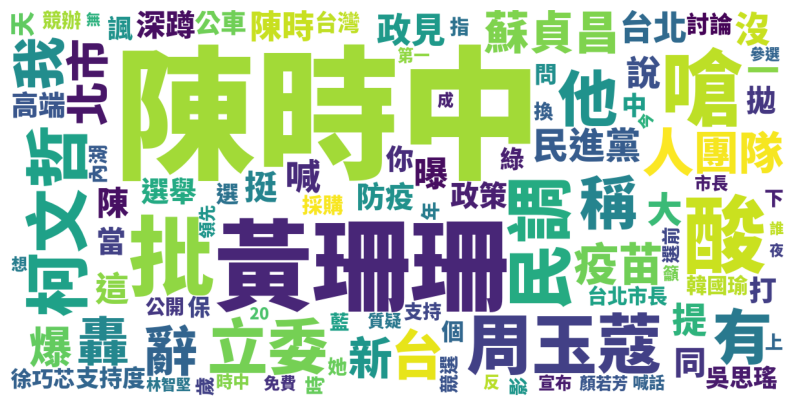

In [18]:
plt.figure(figsize=(10, 7), dpi=100) 
plt.imshow(wc)
plt.axis("off")
plt.show()

**實體辨識**

In [63]:
CKIP_NER = CkipNerChunker(model="bert-base", device=-1)
C_sents_annotated_ner = CKIP_NER(news_clock['標題'])
def filter_by_ner(sent, ner_filter):
    filter_ner_sent = []
    for j, word in enumerate(sent): 
        if word.ner in ner_filter:
            filter_ner_sent.append(word.word)
        return filter_ner_sent


Inference: 100%|██████████| 18/18 [03:27<00:00, 11.52s/it]


In [66]:
ner_filter = ['ORG', 'PERSON', 'GPE', 'NORP', 'LOC', 'FAC', 'EVENT', 'PRODUCT', 'LAW']
C_sents_filter_ner = [filter_by_ner(sent, ner_filter) for sent in C_sents_annotated_ner]
news_clock['CKIP_NER'] = C_sents_filter_ner

C:\Users\CHARLIE\AppData\Local\Temp/ipykernel_25728/4129463631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_clock['CKIP_NER'] = C_sents_filter_ner


In [19]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
te = TransactionEncoder()
te_ary = te.fit(df['segment']).transform(df['segment'])
data_df = pd.DataFrame(te_ary, columns = te.columns_)
freq_item_name = apriori(data_df, min_support=0.01, use_colnames = True)
RULES = association_rules(freq_item_name, min_threshold = 0)
RULES['antecedent_len'] = \
    RULES['antecedents'].apply(lambda x: len(x))
RULES['consequents_len'] = \
    RULES['consequents'].apply(lambda x: len(x))

In [21]:
te = TransactionEncoder()
te_ary = te.fit(news_jiang['segment']).transform(news_jiang['segment'])
data_df = pd.DataFrame(te_ary, columns = te.columns_)

In [ ]:
freq_item_name = apriori(data_df, min_support=0.001, use_colnames = True)
RULES = association_rules(freq_item_name, min_threshold = 0)
RULES['antecedent_len'] = \
    RULES['antecedents'].apply(lambda x: len(x))
RULES['consequents_len'] = \
    RULES['consequents'].apply(lambda x: len(x))

In [30]:
RULES

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
0,(20),(下),0.01,0.01,0.01,0.78,62.08,0.01,4.44,1,1
1,(下),(20),0.01,0.01,0.01,0.64,62.08,0.01,2.72,1,1
2,(免費),(20),0.01,0.01,0.01,0.56,54.20,0.01,2.23,1,1
3,(20),(免費),0.01,0.01,0.01,0.56,54.20,0.01,2.23,1,1
4,(搭),(20),0.01,0.01,0.01,0.71,69.68,0.01,3.46,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2029,(搭),"(20, 免費, 下, 深蹲, 蔣萬安)",0.01,0.01,0.01,0.71,125.43,0.01,3.48,1,5
2030,(免費),"(蔣萬安, 20, 下, 深蹲, 搭)",0.01,0.01,0.01,0.56,97.56,0.01,2.24,1,5
2031,(下),"(蔣萬安, 20, 免費, 深蹲, 搭)",0.01,0.01,0.01,0.45,79.82,0.01,1.82,1,5
2032,(深蹲),"(蔣萬安, 20, 免費, 下, 搭)",0.02,0.01,0.01,0.36,62.71,0.01,1.55,1,5


In [37]:
result = RULES[(RULES['antecedent_len'] >= 1) &
               (RULES['consequents_len'] >= 1) &
               (RULES['confidence'] > 0.5) &
               (RULES['lift'] > 150)]

In [38]:
result.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
32,(紀念堂),(中正),0.01,0.01,0.01,1.00,175.60,0.01,inf,1,1
33,(中正),(紀念堂),0.01,0.01,0.01,1.00,175.60,0.01,inf,1,1
1919,"(搭, 20, 蔣萬安)","(免費, 深蹲)",0.01,0.01,0.01,1.00,175.60,0.01,inf,3,2
1926,"(免費, 蔣萬安, 深蹲)","(搭, 20)",0.01,0.01,0.01,1.00,175.60,0.01,inf,3,2
1927,"(搭, 20)","(免費, 蔣萬安, 深蹲)",0.01,0.01,0.01,1.00,175.60,0.01,inf,2,3
1934,"(免費, 深蹲)","(搭, 20, 蔣萬安)",0.01,0.01,0.01,1.00,175.60,0.01,inf,2,3
1951,"(搭, 下, 蔣萬安)","(免費, 深蹲)",0.01,0.01,0.01,1.00,175.60,0.01,inf,3,2
1955,"(免費, 蔣萬安, 深蹲)","(搭, 下)",0.01,0.01,0.01,1.00,175.60,0.01,inf,3,2
1958,"(搭, 下)","(免費, 蔣萬安, 深蹲)",0.01,0.01,0.01,1.00,175.60,0.01,inf,2,3
1962,"(免費, 深蹲)","(搭, 下, 蔣萬安)",0.01,0.01,0.01,1.00,175.60,0.01,inf,2,3


In [226]:
news_clock[news_clock['標題'].str.contains('髒話')]

,標題,發布日期,看板,內文(clean),人物關鍵字,segment
9037,柯文哲為器捐案斥「想罵髒話」 陳時中：,2022-08-15,Gossiping,1.媒體來源: ETtoday 2.記者署名: 呂晏慈 3.完整新聞標題: 柯文哲為器捐案...,陳時中,"[柯文哲, 器捐案, 斥, 想, 罵, 髒話, 陳時中]"
9039,重提器捐案柯文哲想罵髒話 陳時中：不要,2022-08-15,Gossiping,1.媒體來源:聯合 2.記者署名:胡瑞玲 3.完整新聞標題:這麼容易生氣 4.完整新聞內文...,陳時中,"[重提, 器捐案, 柯文哲, 想, 罵, 髒話, 陳時中]"
9041,柯文哲想罵髒話 陳時中：要不要罵是修養,2022-08-15,Gossiping,備註請放最後面 違者新聞文章刪除 1.媒體來源:三立新聞網 2.記者署名:記者高逸帆／台北...,陳時中,"[柯文哲, 想, 罵, 髒話, 陳時中, 罵, 修養]"
9093,陳時中提器捐疑雲 柯文哲氣到想罵髒話：,2022-08-13,Gossiping,ettoday 陳時中提器捐疑雲\u3000柯文哲氣到想罵髒話：實在可惡 記者陳家祥／台北...,陳時中,"[陳時中, 提, 器捐, 疑雲, 柯文哲, 氣, 想, 罵, 髒話]"
17837,柯文哲不爽提器捐案「想罵髒話」 陳時中,2022-08-15,HatePolitics,1.新聞網址︰ 2.新聞來源︰ 自由 3.完整新聞標題 ：修養問題 4.完整新聞內容︰ ...,陳時中,"[柯文哲, 爽, 提, 器捐案, 想, 罵, 髒話, 陳時中]"
